# Week 03 Assignment Covid

New types of data and new data science technologies enable new research. These new technologies are technologies such as the ability to combine existing data or the ability to generate synthetic data from existing knowledge. This week casus is based on such research. Data is generated by Synthea's COVID-19 module. The data was constructed using three peer-reviewed publications published in the early stages of the global pandemic, when less was known, along with emerging resources, data, publications, and clinical knowledge. The simulation outputs synthetic Electronic Health Records (EHR), including the daily consumption of Personal Protective Equipment (PPE) and other medical devices and supplies. The Data is stored in separate tables to avoid redundancy, with as a concequence that tables need to be combined and reorganized in dataframes for analysing purpose.

Keywords: merge data, subset data, clean data, generate data

You will learn about combining data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the partly Synthetic Covid data in an appropiate format in order to conduct statistical and visual analysis. Learning objectives

- Combine multiple data sources for analysis
- Read, inspect, clean, reshape data
- Visualize data using bokeh
- Maintain development environment 
- Apply coding standards and FAIR principles
- Reshape the dataset into a format suitable for visual and statistical analysis
- Use widgets to make the plot interactive 
- Use GIS libraries to plot geographical data

Tutorials about combining data: https://github.com/fenna/BFVM22PROG1/blob/main/tutorials/tutorial_combine_data.ipynb

study case combining data:https://github.com/fenna/BFVM22PROG1/blob/main/study_cases/adults_who_binge_drank_in_hot_towns.ipynb


Please add the topics you want to learn about here: https://padlet.com/ffeenstra1/kzh2chaqleq3iovu


Your job is to **visualize the lab values taken for COVID-19 patients of survived versus not survived patients**. 

The assignment consists of 6 parts:

- [part 1: load the data](#0)
     - [Exercise 1.1](#ex-11)
- [part 2: data wrangling](#1)
     - [Exercise 2.1](#ex-21)
- [part 3: more wrangling](#2)
     - [Exercise 3.1](#ex-31)
- [part 4: plot the data](#3)
     - [Exercise 4.1](#ex-41)
- [part 5: plot patient location](#5)
     - [Exercise 5.1](#ex-51)


Part 1 and 4 are mandatory, part 5 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 


## About the data

The data is generated by Synthea's COVID-19 module. The data was constructed using three peer-reviewed publications published in the early stages of the global pandemic, when less was known, along with emerging resources, data, publications, and clinical knowledge. The simulation outputs synthetic Electronic Health Records (EHR), including the daily consumption of Personal Protective Equipment (PPE) and other medical devices and supplies. For this assignment the `conditions`, `patients`, `observations`, `careplans` and `encounters` table will be used. The Data is stored in separate tables to avoid redundancy, with as a concequence that tables need to be combined and reorganized in dataframes for analysing purpose.

Source: Walonoski J, Klaus S, Granger E, Hall D, Gregorowicz A, Neyarapally G, Watson A, Eastman J. Synthea™ Novel coronavirus (COVID-19) model and synthetic data set. Intelligence-Based Medicine. 2020 Nov;1:100007. https://doi.org/10.1016/j.ibmed.2020.100007

Please <a href = "https://synthetichealth.github.io/synthea-sample-data/downloads/10k_synthea_covid19_csv.zip">download</a> the data

#### Covid Patients
Patients are considered Covid patients if they are identified with `CODE` `840539006`


#### Survivors
Patients that had covid and where tested negative after isolation have tested code `94531-1`,  SARS-CoV-2 RNA Pnl Resp NAA+probe (covid-sars test) + a value of `Not detected (qualifier value)`. These patients are considered to be survived covid patients. 

#### Non-Survivors
Patients that did not survived Covid have a `DEATHDATE` which is not null. 


#### Lab values  COVID-19 patients

Patients are monitored for blood and heart conditions once they are admitted in Hospital or under treatment. The lab values of interest are as follow: 

- `48065-7`  Fibrin D-dimer FEU [Mass/volume] in Platelet poor plasma
- `26881-3`   Interleukin 6 [Mass/volume] in Serum or Plasma
- `2276-4` Ferritin [Mass/volume] in Serum or Plasma
- `89579-7` Troponin I.cardiac [Mass/volume] in Serum or Plasma by High sensitivity method
- `731-0` Lymphocytes [#/volume] in Blood by Automated count
- `14804-9` Lactate dehydrogenase [Enzymatic activity/volume] in Serum or Plasma by Lactate to pyruvate reaction


---

<a name='0'></a>
## Part 1: Load the data (20 pt)

Instructions: Load the data of the following files. 
Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

- conditions.csv
- patients.csv
- observations.csv
- careplans.csv
- encounters.csv

Get yourself familiar with the data. Create some meaningful overviews. Answer the following questions

1. How many patients are there
2. How many covid-patients are there
3. How many patients do have a 'Hospital admission for isolation' encounter
    
<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>use a unique dataframe for each file, use a meaningful name</li>
    <li>pandas.read_csv() method can be used to read a csv file</li>
    <li>pandas.DataFrame.head() method is often used to inspect the dataframe</li>
    <li>.unique() returns a list of unique values of a column</li>
</ul>
</details>

<a name='ex-11'></a>
### 1.1 Code your solution

In [2]:
#YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml


config = open("/homes/memartinus/Desktop/programming1/BFVM22PROG1/assessments/config_2.yml","r")
dictionary = yaml.safe_load(config)

condition_matrix = pd.read_csv(dictionary["conditions"])
patients_matrix = pd.read_csv(dictionary["patients"])
observation_matrix =pd.read_csv(dictionary["observations"])
careplants_matrix = pd.read_csv(dictionary["careplans"])
encounters_matrix = pd.read_csv(dictionary["encounters"])

print(len(patients_matrix["Id"].unique()))
num_cov = len(observation_matrix[observation_matrix["CODE"]== 840539006])
print(num_cov)





12352
0


### 1.2 Test your solution
The following function needs to be called. You can use this as a test. There are however more meaningful overviews 
you can create. 

In [29]:
def part1(num_pat, num_cov, num_admitted, num_died):
    print(f'There are {num_pat} patients in total')
    print(f'There are {num_cov} covid patients')
    print(f'There are {num_admitted} admitted patients')
    print(f'{num_died} patients died')


### Expected outcome

---

<a name='1'></a>
## Part 2: Data Wrangling: set up the dataframe (30 pt)

In this part we are going to combine data to create a dataframe with values of interest for the lab values analysis. 

We would like a dataframe containing the following information per record (only Covid patients!!!)

- `PATIENT` - the ID of the covid patient
- `days` - the number of days the patient is under observation
- `CODE-Y` - the code of the observation  
- `VALUE` - the lab value of the observation

where only the following observation codes needs to be selected:

- `48065-7`  Fibrin D-dimer FEU [Mass/volume] in Platelet poor plasma
- `26881-3`   Interleukin 6 [Mass/volume] in Serum or Plasma
- `2276-4` Ferritin [Mass/volume] in Serum or Plasma
- `89579-7` Troponin I.cardiac [Mass/volume] in Serum or Plasma by High sensitivity method
- `731-0` Lymphocytes [#/volume] in Blood by Automated count
- `14804-9` Lactate dehydrogenase [Enzymatic activity/volume] in Serum or Plasma by Lactate to pyruvate reaction

The days information is not primarely available and needs to be calculated by substracting observation DATE - START. 

An example of such a dataframe is given below:

In [9]:
#Possible approach:

#Select all the patients with covid from the conditions table
#Combine conditions table (only covid patients) with the patient table into a covid_patient table
#select the only the relevant lab observations from the observations table into a lab_obs table
#merge the covid_patient table with the lab_obs table into a covid_patients_obs table
#clean the covid_patients_obs table (rename columns, select only relevant columns, sort, typecast, add days column)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>you can use pandas.DataFrame.merge() to merge dataframes</li>
    <li>df = df[(df.CODE == condition1 | df.CODE == condition1 )] selects rows with CODE of 2 conditional values</li>
    <li>df.DATE - df.START return days if DATE and START are datetime format</li>
    <li>pd.to_datetime() can be used to typecast to datetime</li>
</ul>
</details>

<a name='ex-21'></a>
### 2.1 Code your solution

In [7]:
#YOUR CODE HERE
condition_patients = condition_matrix[condition_matrix["CODE"]== 840539006]

covid_table = pd.merge(condition_patients,patients_matrix,left_on="PATIENT",right_on="Id")
lab_obs = observation_matrix[observation_matrix["CODE"].isin(["48065-7","26881-3","2276-4","89579-7","731-0","14804-9"])]
covid_patients_obs = pd.merge(lab_obs,covid_table,left_on="PATIENT",right_on="PATIENT")
covid_patients_obs["START"] = pd.to_datetime(covid_patients_obs["START"])
covid_patients_obs["STOP"] = pd.to_datetime(covid_patients_obs["STOP"])

covid_patients_obs["DAYS"] = covid_patients_obs["STOP"] - covid_patients_obs["START"]

covid_patients_data = covid_patients_obs[["PATIENT","DAYS","CODE_x","VALUE","UNITS"]].copy()
covid_patients_data.head()


,PATIENT,DAYS,CODE_x,VALUE,UNITS
0,f58bf921-cba1-475a-b4f8-dc6fa3b8f89c,9 days,731-0,1.1,10*3/uL
1,f58bf921-cba1-475a-b4f8-dc6fa3b8f89c,9 days,48065-7,0.4,ug/mL
2,f58bf921-cba1-475a-b4f8-dc6fa3b8f89c,9 days,2276-4,332.4,ug/L
3,f58bf921-cba1-475a-b4f8-dc6fa3b8f89c,9 days,89579-7,2.3,pg/mL
4,f58bf921-cba1-475a-b4f8-dc6fa3b8f89c,9 days,14804-9,223.9,U/L


---

<a name='2'></a>
## Part 3: Data Wrangling, split into survived and not survived (10 pt)

Now we have the required data we would like to split the data into survived and not survived. First we fetch all the ids of the survived and deceased patients. We can use these ids to select the records of the survived patients and the patients that did not survived

Your job is to split the data into survived and not survived records. There are multiple ways to do this. One way is the  `.isin()` method

In [9]:
#the following code is given, RUN THIS CELL
#get survived and deceased ids
completed_isolation_patients = careplants_matrix[(careplants_matrix.CODE == 736376001) & (careplants_matrix.STOP.notna()) \
                                          & (careplants_matrix.REASONCODE == 840539006)].PATIENT
negative_covid_patient_ids = observation_matrix[(observation_matrix.CODE == '94531-1') \
                                          & (observation_matrix.VALUE == 'Not detected (qualifier value)')].PATIENT.unique()
survivor_ids = np.union1d(completed_isolation_patients, negative_covid_patient_ids)
deceased_ids = patients_matrix[patients_matrix.DEATHDATE.notna()].Id

<a name='ex-31'></a>
### 3.1 Code your solution

In [30]:
#YOUR CODE HERE
list_dec = list(deceased_ids)
list_sur = list(survivor_ids)

sur_array = covid_patients_data[covid_patients_data["PATIENT"].isin(survivor_ids)]
dec_array = covid_patients_data[covid_patients_data["PATIENT"].isin(deceased_ids)]

survived = len(sur_array)
died = len(dec_array)


### 3.2 Test your solution

In [33]:
def test3(survived,died):
    print(f'patients records survived: {survived}, patients records deceased {died}')
#call the test3
test3(survived,died)

patients records survived: 57303, patients records deceased 16793


#### Expected outcome

---

<a name='3'></a>
## Part 4: Plot the data (20 pt)

Create plots with the lab data, for each code one plot. Separate the survivors and the deceased by color. An example of such a plot is given below. You can create 6 plots in one grid (for each code one plot) or use a widget (for instance a drop down menu widget) to select a lab CODE. Plot on the x-axis the days, on the y-axis the VALUE. Use proper labels, titles and legends.

<img src="../images/week3_plot.png" width="500" height="500"/>

<a name='ex-41'></a>
### 4.1 Code your solution

TypeError: float() argument must be a string or a number, not 'Timedelta'

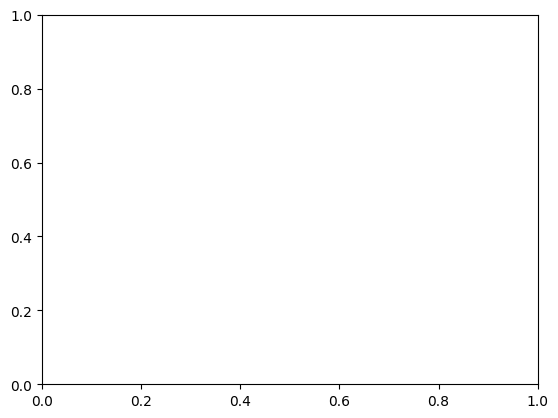

In [67]:
#YOUR CODE HERE

a_S = pd.DataFrame(sur_array[sur_array.CODE_x.values == "48065-7"])
a_D = pd.DataFrame(dec_array[dec_array.CODE_x.values == "48065-7"])

b_S = pd.DataFrame(sur_array[sur_array.CODE_x.values == "26881-3"])
b_D = pd.DataFrame(dec_array[dec_array.CODE_x.values == "26881-3"])

c_S = pd.DataFrame(sur_array[sur_array.CODE_x.values == "2276-4"])
c_D = pd.DataFrame(dec_array[dec_array.CODE_x.values == "2276-4"])

d_S = pd.DataFrame(sur_array[sur_array.CODE_x.values == "89579-7"])
d_D = pd.DataFrame(dec_array[dec_array.CODE_x.values == "89579-7"])

e_S = pd.DataFrame(sur_array[sur_array.CODE_x.values == "731-0"])
e_D = pd.DataFrame(dec_array[dec_array.CODE_x.values == "731-0"])

f_S = pd.DataFrame(sur_array[sur_array.CODE_x.values == "14804-9"])
f_D = pd.DataFrame(dec_array[dec_array.CODE_x.values == "14804-9"])


def get_list(array):
    casted_value = []
    for i in array["VALUE"]:
        i = float(i)
        casted_value.append(i)

    return casted_value

def get_days(array):        
    return list(array["DAYS"])
        
          


plt.scatter(get_list(a_S),get_days(a_S),color="cyan")
plt.scatter(get_list(a_D),get_days(a_D),color="hotpink")
plt.show()




<a name='4'></a>
## Part 5: Plot the location of the patients (10 pt)

This is a bonus part. Can you plot the patients location on a map? See also 
https://docs.bokeh.org/en/latest/docs/user_guide/geo.html 

You can use either package folium or geopandas. You need the Latitude and Longitude information from the patient tabel


<a name='ex-51'></a>
### 5.1 Code your solution

In [1]:
#YOUR CODE HERE